In [1]:
%matplotlib inline
import plot_helpers as ph
from matplotlib import pyplot as plt

In [16]:
fairgp1_files = [
    ('../results/ICML/adult/gpyt2500_dempar_race.csv', ''),
    ('../results/ICML/adult/gpyt2500_dempar_sex.csv', ''),
]
def label_change(label):
    parts = label.split('_')
    mode = parts[-1]
    in_True = parts[4] == "True"
    if not in_True:
        return
    optional_star = "*" if in_True else ""
    with_s = ", use $s$" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    return "average" if mode == "True" else mode, True

fairgp1 = ph.parse_all(fairgp1_files, label_change)

In [17]:
fairgp2_files = [
    ('../results/ICML/adult/gpyt2500_dempar_min_max_race.csv', ''),
    ('../results/ICML/adult/gpyt2500_dempar_min_max_sex.csv', ''),
]
def label_change(label):
    parts = label.split('_')
    mode = parts[-1]
    in_True = parts[4] == "True"
    if not in_True:
        return
    optional_star = "*" if in_True else ""
    with_s = ", use $s$" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    return "average" if mode == "True" else mode, True

fairgp2 = ph.parse_all(fairgp2_files, label_change)

In [18]:
fairgp = ph.merge_plot_defs(fairgp1, fairgp2)

In [10]:
# fairgp = ph.choose_entries(fairgp, [0, 5, 1, 6, 2, 7, 3, 8, 4, 9])

In [5]:
def acc_vs_di(plot, do_legend, *data):
    xaxis = ('DIbinary', '$PR_{s=0}\\,/\\,PR_{s=1}$')
    yaxis = ('accuracy', 'accuracy')
    legends = []
    startindex = 0
    legend = "outside" if do_legend else None

    plot.axvline(x=1.0, linestyle='--', color='k', label="perfect fairness" if do_legend else None)
    for data_structure in data:
        legends += [ph.errorbox(plot, data_structure, xaxis, yaxis, legend=legend, firstcolor=startindex // 2, firstshape=startindex)]
        startindex += len(data_structure.entries)
    if do_legend:
        return legends

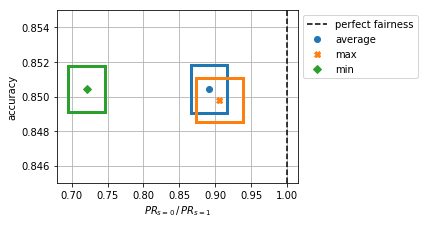

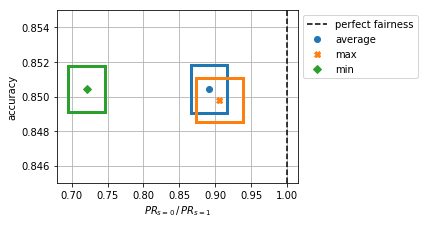

In [25]:
fig, plot = plt.subplots(figsize=(6, 2.6))
legends = acc_vs_di(plot, True, fairgp[0])
# plots[0].set_title("(a) sensitive attribute: race", loc='left')
plot.set_ylim(0.845, 0.855)
# plots[0].set_xlim(0.07, 0.38)

fig.tight_layout()
fig.subplots_adjust(bottom=0)
fig.savefig(f"dempar_min_max_icml.pdf",
            dpi=200, bbox_extra_artists=legends, bbox_inches='tight', pad_inches=0)
fig